## Визуализация данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

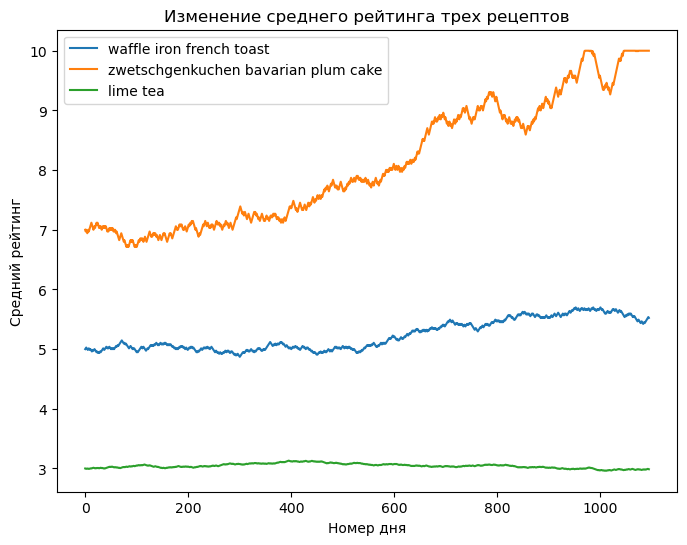

In [2]:
# Загрузка данных из файла
data = np.load('data/average_ratings.npy')

# Создание графика
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data[0], label='waffle iron french toast')
ax.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(data[2], label='lime tea')

# Добавление подписей осей и заголовка
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend(loc='upper left')

# Отображение графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


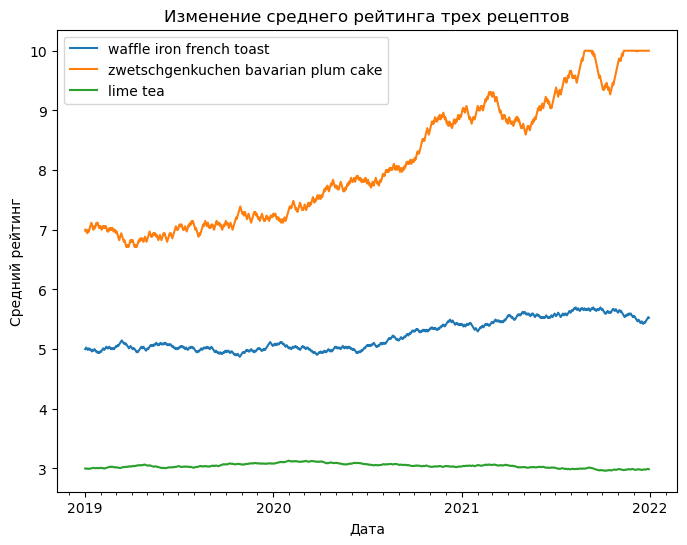

In [3]:
# Создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = pd.date_range(start=start_date, end=end_date)

# # Создание графика
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dates, data[0], label='waffle iron french toast')
ax.plot(dates, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dates, data[2], label='lime tea')

# Настройка major_locator и minor_locator горизонтальной оси
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Добавление подписей осей и заголовка
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

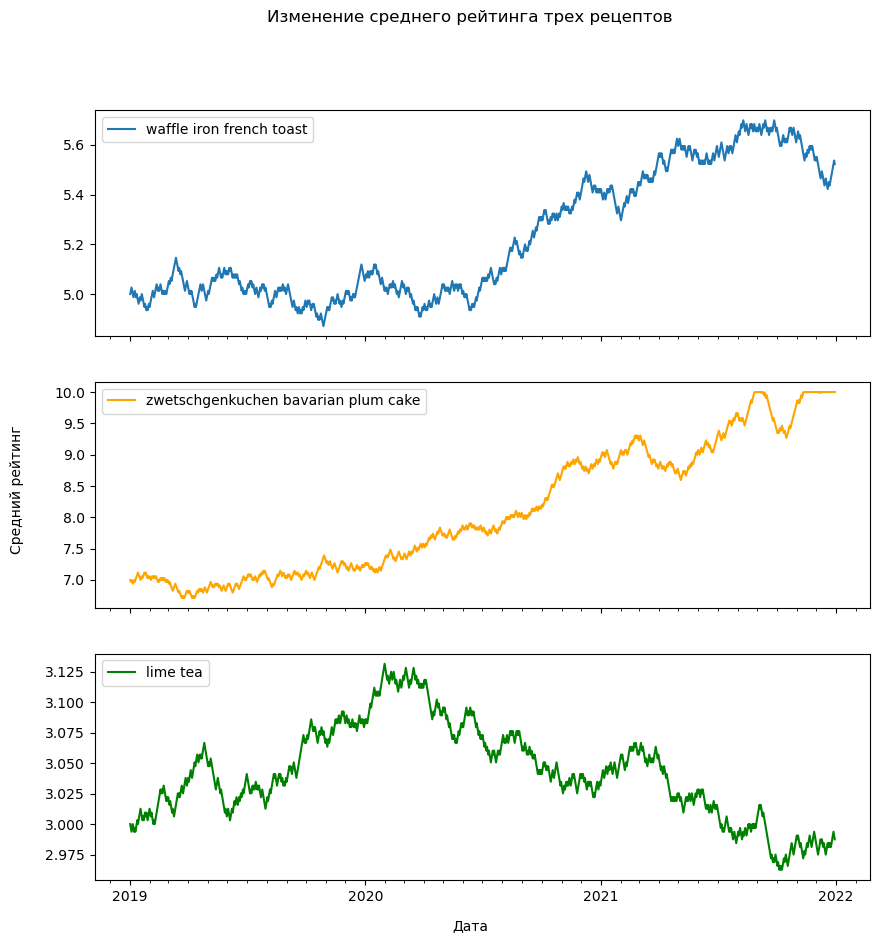

In [4]:
# Создание графиков
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
axs[0].plot(dates, data[0], label='waffle iron french toast')
axs[1].plot(dates, data[1], color='orange', label='zwetschgenkuchen bavarian plum cake')
axs[2].plot(dates, data[2], color='green',label='lime tea')

# Настройка major_locator и minor_locator горизонтальной оси
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())

# Добавление подписей осей и заголовка
fig.text(0.5, 0.06, 'Дата', ha='center')
fig.text(0.04, 0.5, 'Средний рейтинг', va='center', rotation='vertical')
fig.suptitle('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

# Отображение графиков
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


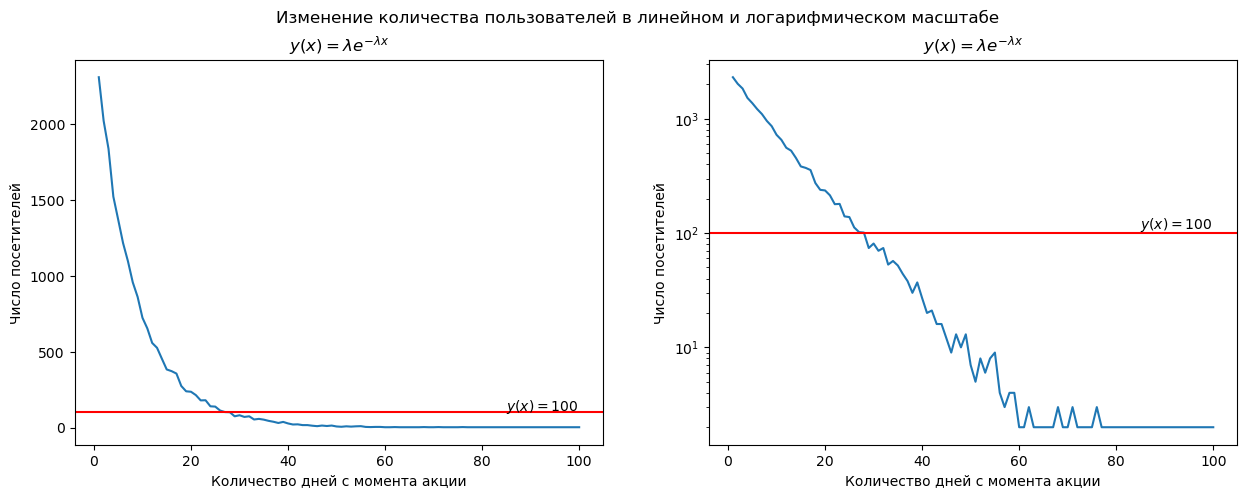

In [5]:
# Загрузка данных из файла
data = np.load('data/visitors.npy')

# Создание диапазона дат
days = np.arange(1, 101)

# Создание графиков
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Построение линейного графика
axs[0].plot(days, data)
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title(r'$y(x)=\lambda e^{-\lambda x}$')
axs[0].axhline(y=100, color='r', linestyle='-')
axs[0].text(85, 110, r'$y(x)=100$')

# Построение логарифмического графика
axs[1].semilogy(days, data)
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title(r'$y(x)=\lambda e^{-\lambda x}$')
axs[1].axhline(y=100, color='r', linestyle='-')
axs[1].text(85, 110, r'$y(x)=100$')

# Добавление общего заголовка для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

# Отображение графиков
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [6]:
# Загрузка таблиц
recipes = pd.read_csv('data/recipes_sample.csv')
reviews = pd.read_csv('data/reviews_sample.csv', parse_dates=['date'])

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

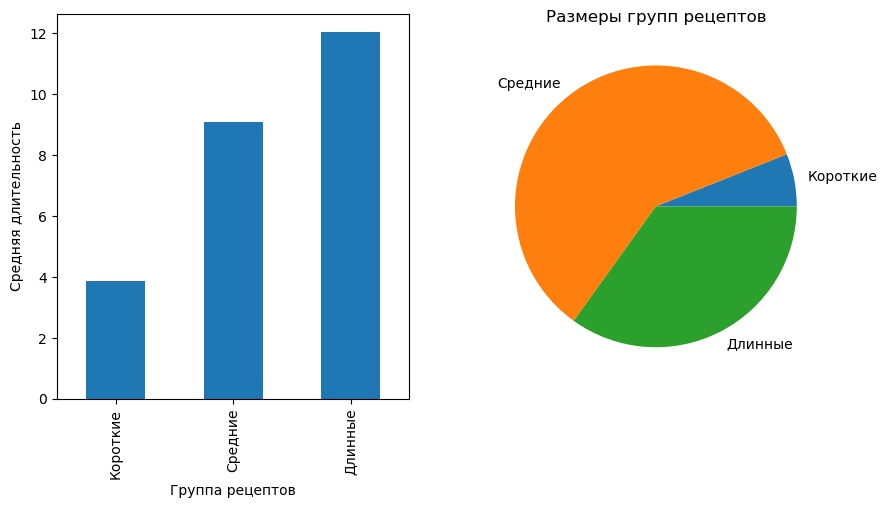

In [13]:
# Определение категории длительности рецепта
recipes['duration_category'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=['Короткие', 'Средние', 'Длинные'])

# Группировка рецептов по длительности и подсчет среднего количества шагов и размера группы
grouped_recipes = recipes.groupby('duration_category').agg({'n_steps': 'mean', 'id': 'size'}).rename(columns={'id': 'количество', 'n_steps': 'шаги'})

# Создание графиков
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Столбчатая диаграмма
grouped_recipes.plot(kind='bar', y='шаги', legend=False, ax=ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

# Круговая диаграмма
grouped_recipes.plot(kind='pie', y='количество', legend=False, ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Размеры групп рецептов')

# Отображение графиков
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

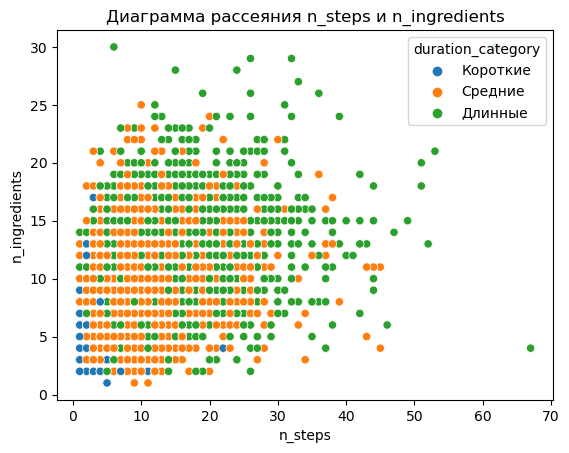

In [11]:
# Построение диаграмма рассеяния
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="duration_category")
plt.title("Диаграмма рассеяния n_steps и n_ingredients")

# Отображение графика
plt.show()

Между переменными n_steps и n_ingredients линейная зависимость не наблюдается.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [9]:
# Создание таблицы
recipes_reviews = pd.merge(recipes, reviews, left_on ='id', right_on = 'recipe_id')[['minutes', 'n_steps', 'n_ingredients', 'rating']]

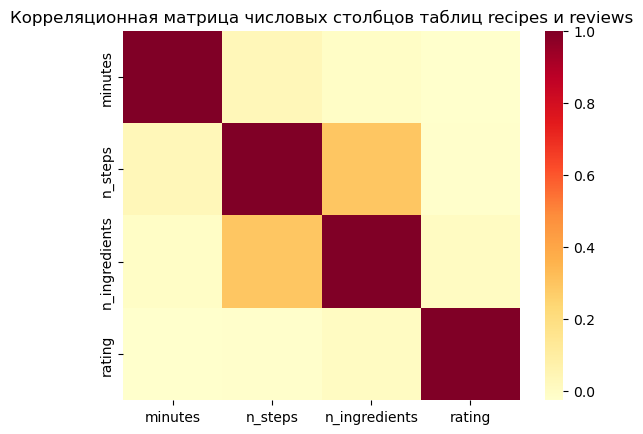

In [12]:
# Создание графика
plt.figure()

# Построение тепловой карты
sns.heatmap(recipes_reviews.corr(), cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

# Отображение графика
plt.show()